https://www.kaggle.com/datasets/kkhandekar/all-datasets-for-practicing-ml

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing

# Load the dataset
housing = fetch_california_housing(as_frame=True)
housing_df = housing.frame

# Introduce some missing values for practice
np.random.seed(42)
missingness_fraction = 0.1
for col in housing_df.drop("MedHouseVal", axis = 1).columns:
    housing_df.loc[housing_df.sample(frac=missingness_fraction).index, col] = np.nan

# Display the first few rows of the dataset
(housing_df.head())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,NaN,3.521
3,NaN,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,NaN,3.422


In [4]:
housing_df.isna().sum()

MedInc         2064
HouseAge       2064
AveRooms       2064
AveBedrms      2064
Population     2064
AveOccup       2064
Latitude       2064
Longitude      2064
MedHouseVal       0
dtype: int64

In [5]:
housing_df.shape

(20640, 9)

In [16]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [17]:
from sklearn.model_selection import train_test_split
X = housing_df.drop("MedHouseVal", axis = 1)
y = housing_df["MedHouseVal"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

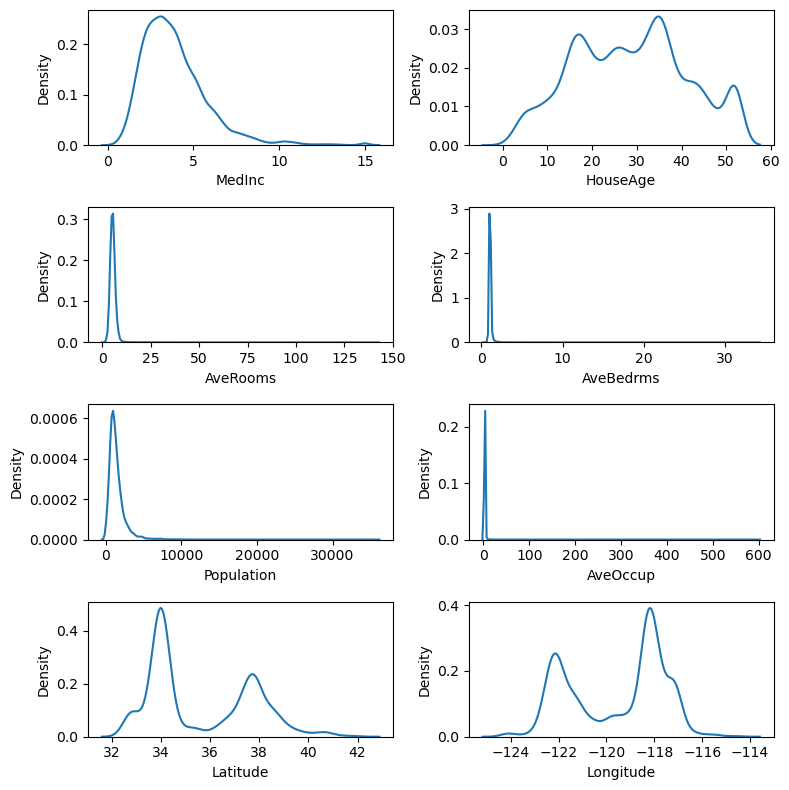

In [13]:
fig, axis = plt.subplots(nrows = 4, ncols = 2, figsize = (8, 8))
cols = X_train.columns.to_list()
k = 0
for i in range(4):
    for j in range(2):
        sns.kdeplot(x = X_train[cols[k]], ax = axis[i][j])
        k = k + 1
plt.tight_layout()
plt.show()

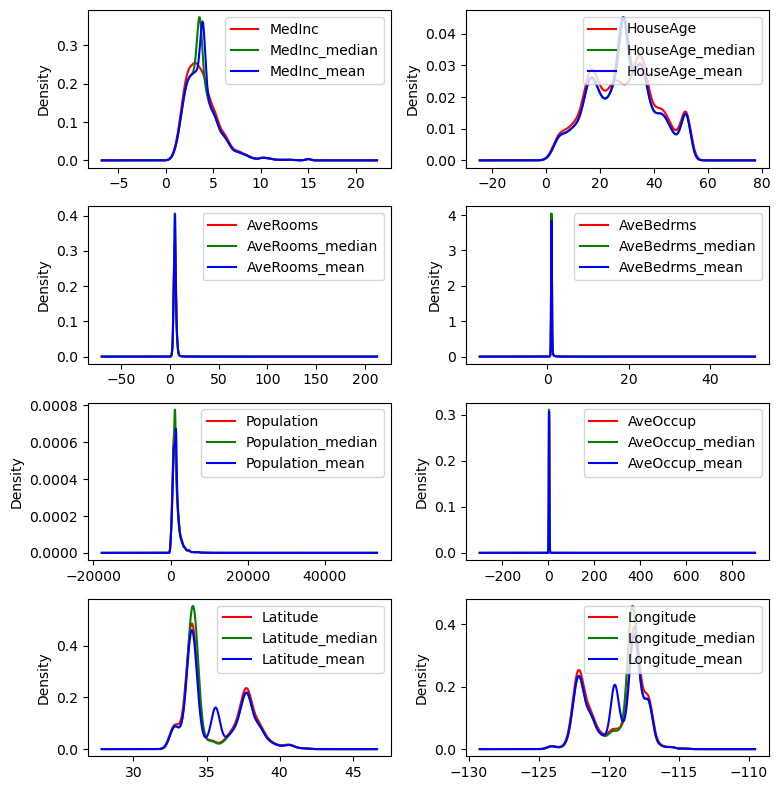

In [20]:
fig, axis = plt.subplots(nrows = 4, ncols = 2, figsize = (8, 8))
k = 0
for i in range(4):
    for j in range(2):
        X_train[cols[k] + "_median"] = X_train[cols[k]].fillna(X_train[cols[k]].median())
        X_train[cols[k] + "_mean"] = X_train[cols[k]].fillna(X_train[cols[k]].mean())
        
        X_train[cols[k]].plot(kind = "kde", ax = axis[i][j], color = "red")
        X_train[cols[k] + "_median"].plot(kind = "kde", ax = axis[i][j], color = "green")
        X_train[cols[k] + "_mean"].plot(kind = "kde", ax = axis[i][j], color = "blue")
        lines, labels = axis[i][j].get_legend_handles_labels()
        axis[i][j].legend(lines, labels, loc='best')
        k = k + 1

plt.tight_layout()
plt.show()

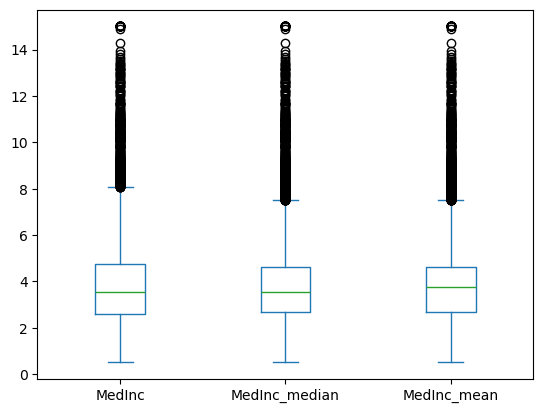

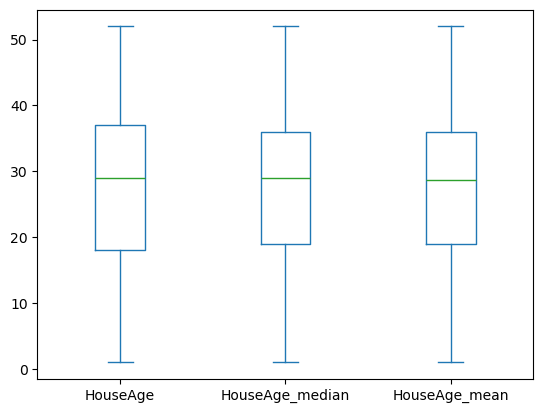

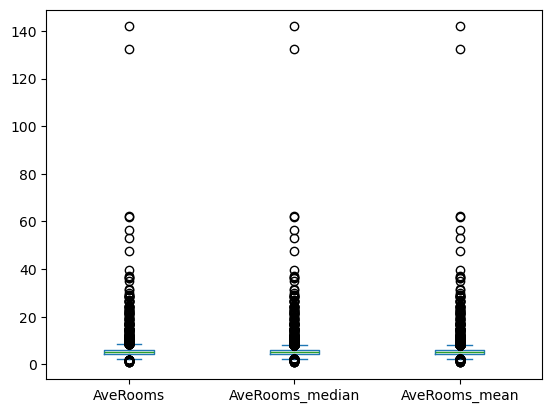

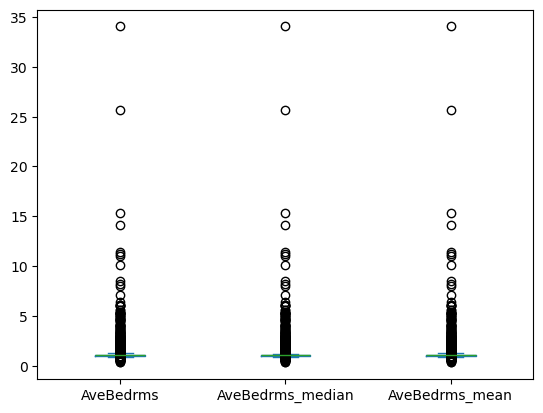

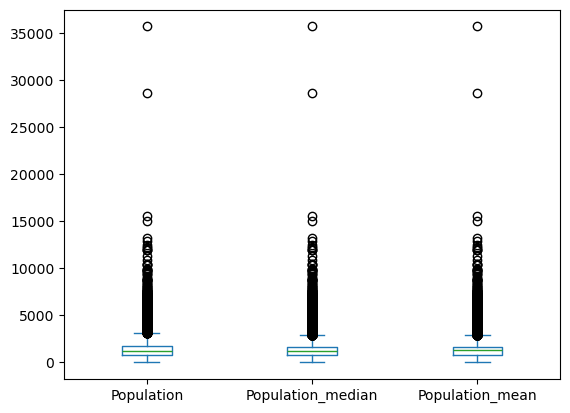

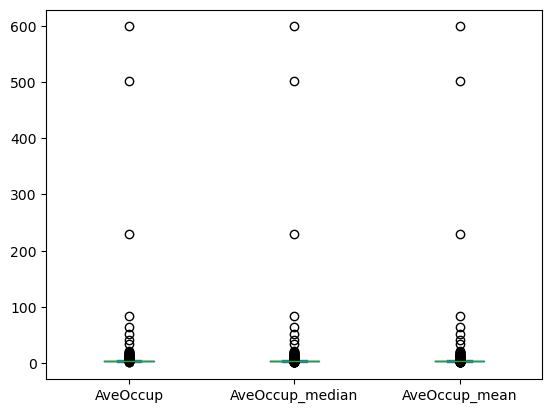

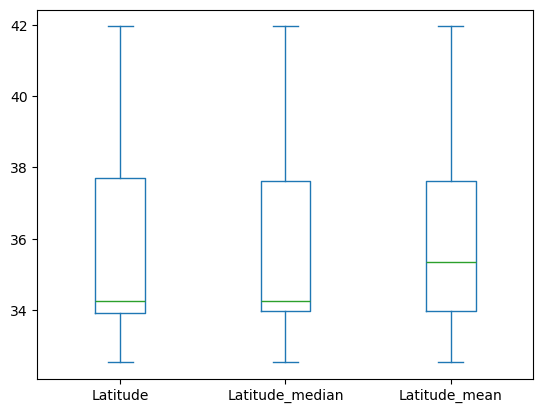

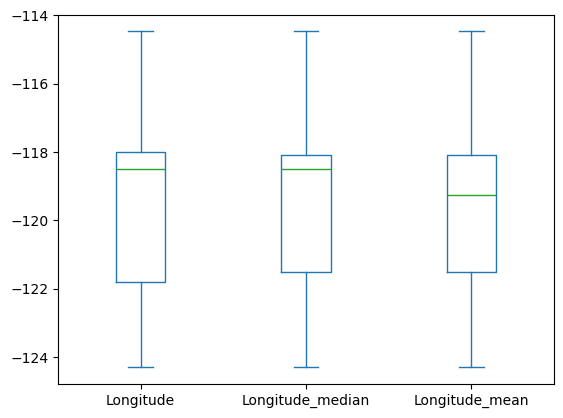

In [22]:
for col in cols:
    X_train[[col, col + "_median", col + "_mean"]].plot(kind = "box")

In [29]:

for col in cols:
    print(f"Variance of original {col} is {X_train[col].var()}")
    print(f"Variance of median imputation of {col} is {X_train[col+'_median'].var()}")
    print(f"Variance of mean imputation of {col} is {X_train[col + '_mean'].var()}")
    print("\n")

Variance of original MedInc is 3.6243290643865764
Variance of median imputation of MedInc is 3.268149525895389
Variance of mean imputation of MedInc is 3.258625459440291


Variance of original HouseAge is 158.7659665691242
Variance of median imputation of HouseAge is 142.6336175482213
Variance of mean imputation of HouseAge is 142.62108994931558


Variance of original AveRooms is 6.582858293725368
Variance of median imputation of AveRooms is 5.927062544731978
Variance of mean imputation of AveRooms is 5.923416247948524


Variance of original AveBedrms is 0.24907458450132008
Variance of median imputation of AveBedrms is 0.22456165523313903
Variance of mean imputation of AveBedrms is 0.22436474443026652


Variance of original Population is 1324853.3297139832
Variance of median imputation of Population is 1199791.8027730223
Variance of mean imputation of Population is 1193659.8711662027


Variance of original AveOccup is 46.01711601992525
Variance of median imputation of AveOccup is 41.42

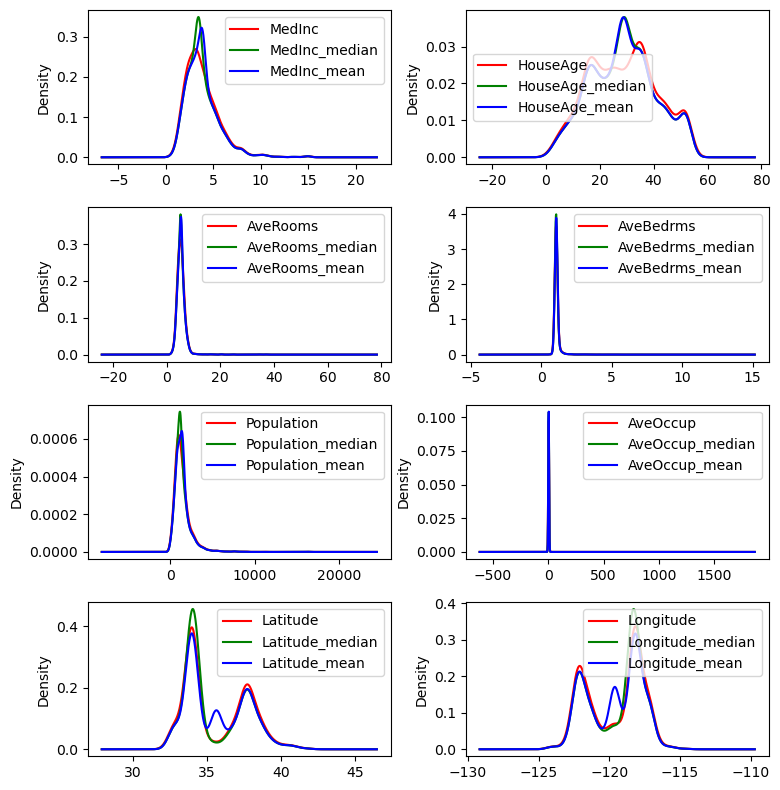

In [31]:
fig, axis = plt.subplots(nrows = 4, ncols = 2, figsize = (8, 8))
k = 0
for i in range(4):
    for j in range(2):
        X_test[cols[k] + "_median"] = X_test[cols[k]].fillna(X_test[cols[k]].median())
        X_test[cols[k] + "_mean"] = X_test[cols[k]].fillna(X_test[cols[k]].mean())
        
        X_test[cols[k]].plot(kind = "kde", ax = axis[i][j], color = "red")
        X_test[cols[k] + "_median"].plot(kind = "kde", ax = axis[i][j], color = "green")
        X_test[cols[k] + "_mean"].plot(kind = "kde", ax = axis[i][j], color = "blue")
        lines, labels = axis[i][j].get_legend_handles_labels()
        axis[i][j].legend(lines, labels, loc='best')
        k = k + 1

plt.tight_layout()
plt.show()

In [33]:
### For test dataset
for col in cols:
    print(f"Variance of original {col} is {X_test[col].var()}")
    print(f"Variance of median imputation of {col} is {X_test[col+'_median'].var()}")
    print(f"Variance of mean imputation of {col} is {X_test[col + '_mean'].var()}")
    print("\n")

Variance of original MedInc is 3.399378800721707
Variance of median imputation of MedInc is 3.0821131951270604
Variance of mean imputation of MedInc is 3.071549199876728


Variance of original HouseAge is 156.20313792944407
Variance of median imputation of HouseAge is 141.6369126526385
Variance of mean imputation of HouseAge is 141.6312435502737


Variance of original AveRooms is 5.103590964789616
Variance of median imputation of AveRooms is 4.600603531689543
Variance of mean imputation of AveRooms is 4.5965707817114145


Variance of original AveBedrms is 0.16807995242000517
Variance of median imputation of AveBedrms is 0.1509561153040123
Variance of mean imputation of AveBedrms is 0.15073028929160143


Variance of original Population is 1193354.2128289244
Variance of median imputation of Population is 1075477.4294726988
Variance of mean imputation of Population is 1069305.5195157158


Variance of original AveOccup is 414.9893951108707
Variance of median imputation of AveOccup is 373.3

Thus, mean-median imputation is not best although we will try it to see how much it increases the acuuracy of our model.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor

In [34]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
cols_imputed = X_train.columns.to_list()
X_train[cols_imputed] = st.fit_transform(X_train)
X_test[cols_imputed] = st.transform(X_test)

In [35]:
X_train.drop(columns = cols, inplace = True)
X_test.drop(columns = cols, inplace = True)

In [36]:
cols_median = [col for col in X_train.columns.to_list() if col.endswith("_median")]
cols_mean = [col for col in X_train.columns.to_list() if col.endswith("_mean")]

In [41]:
X_train_median = X_train[cols_median]
X_test_median = X_test[cols_median]
X_train_mean = X_train[cols_mean]
X_test_mean = X_test[cols_mean]

lr = LinearRegression(n_jobs = -1)
lr.fit(X_train_median, y_train)

LinearRegression(n_jobs=-1)

In [42]:
r2_score(y_test, lr.predict(X_test_median))

0.46960198598214387

In [46]:
rfr = RandomForestRegressor(n_jobs = -1)
param_grid = {"n_estimators" : [150, 200, 300, 350, 400]}
rfr_cv = GridSearchCV(rfr, param_grid = param_grid, n_jobs = -1)
rfr_cv.fit(X_train_median, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_estimators': [150, 200, 300, 350, 400]})

In [47]:
rfr_best = rfr_cv.best_estimator_
rfr_best.fit(X_train_median, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1)

In [48]:
r2_score(y_test, rfr_best.predict(X_test_median))

0.743012030625408

In [50]:
estimators_layer1 = [("lr1", LinearRegression()), ("svr1", SVR()), ("rfr", RandomForestRegressor())]
layer1 = StackingRegressor(estimators = estimators_layer1, final_estimator = RandomForestRegressor(), n_jobs = -1)

estimators_layer2 = [("layer1", layer1), ("svr1", SVR()), ("rfr", RandomForestRegressor())]
layer2 = StackingRegressor(estimators = estimators_layer2, final_estimator = RandomForestRegressor(), n_jobs = -1)

In [51]:
layer2.fit(X_train_median, y_train)

StackingRegressor(estimators=[('layer1',
                               StackingRegressor(estimators=[('lr1',
                                                              LinearRegression()),
                                                             ('svr1', SVR()),
                                                             ('rfr',
                                                              RandomForestRegressor())],
                                                 final_estimator=RandomForestRegressor(),
                                                 n_jobs=-1)),
                              ('svr1', SVR()),
                              ('rfr', RandomForestRegressor())],
                  final_estimator=RandomForestRegressor(), n_jobs=-1)

In [52]:
r2_score(y_test, layer2.predict(X_test_median))

0.7106327156292696

In [53]:
estimators_layer1 = [("lr1", LinearRegression()), ("svr1", SVR()), ("rfr", RandomForestRegressor())]
layer1 = StackingRegressor(estimators = estimators_layer1, final_estimator = RandomForestRegressor(), n_jobs = -1)

estimators_layer2 = [("layer1", layer1), ("svr1", SVR()), ("rfr", RandomForestRegressor())]
layer2 = StackingRegressor(estimators = estimators_layer2, final_estimator = RandomForestRegressor(), n_jobs = -1)

In [54]:
layer2.fit(X_train_mean, y_train)

StackingRegressor(estimators=[('layer1',
                               StackingRegressor(estimators=[('lr1',
                                                              LinearRegression()),
                                                             ('svr1', SVR()),
                                                             ('rfr',
                                                              RandomForestRegressor())],
                                                 final_estimator=RandomForestRegressor(),
                                                 n_jobs=-1)),
                              ('svr1', SVR()),
                              ('rfr', RandomForestRegressor())],
                  final_estimator=RandomForestRegressor(), n_jobs=-1)

In [59]:
r2_score(y_test, layer2.predict(X_test_mean))

0.7110072577783597

E:\Anaconda\Lib\site-packages\joblib\_memmapping_reducer.py:603: UserWarning: Failed to delete temporary folder: C:\Users\ZOHAIB~1\AppData\Local\Temp\joblib_memmapping_folder_17448_1e4a88d1e13a41fea3b7f720031d0b8c_6555cb6f401946d7b7434dba8dd9832b
  warnings.warn("Failed to delete temporary folder: {}"
E:\Anaconda\Lib\site-packages\joblib\_memmapping_reducer.py:603: UserWarning: Failed to delete temporary folder: C:\Users\ZOHAIB~1\AppData\Local\Temp\joblib_memmapping_folder_17448_f8bcf590b1264753bada85e31243f1c9_39af310e381c43cb8672e9f4447df144
  warnings.warn("Failed to delete temporary folder: {}"
E:\Anaconda\Lib\site-packages\joblib\_memmapping_reducer.py:603: UserWarning: Failed to delete temporary folder: C:\Users\ZOHAIB~1\AppData\Local\Temp\joblib_memmapping_folder_17448_1e4a88d1e13a41fea3b7f720031d0b8c_756d15cbeb684e0db7a93b2794833e05
  warnings.warn("Failed to delete temporary folder: {}"
E:\Anaconda\Lib\site-packages\joblib\_memmapping_reducer.py:603: UserWarning: Failed to del

### Now we will use KNN imputer to impute the missing values and check the performance of various models

In [1]:
from sklearn.impute import KNNImputer

In [15]:
cols = housing_df.drop("MedHouseVal", axis = 1).columns.to_list()
knn_imputer = KNNImputer(n_neighbors = 4, weights = "distance")
X_train[cols] = knn_imputer.fit_transform(X_train)
X_test[cols] = knn_imputer.transform(X_test)

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### Gradient Boosting Regressor

In [20]:
gbr = GradientBoostingRegressor()
param_grid = {"n_estimators" : [100, 150, 200, 250, 300], "learning_rate" : [0.2, 0.01, 0.3]}
gbr_cv = GridSearchCV(gbr, param_grid = param_grid, n_jobs = -1, cv = 3)
gbr_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.01, 0.3],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [21]:
gbr_cv.best_score_

0.7437102529208742

In [22]:
gbr_best = gbr_cv.best_estimator_
gbr_best.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=300)

In [23]:
r2_score(y_test, gbr_best.predict(X_test))

0.7477996405104219

#### Stacking Regressor

In [24]:
estimators_layer1 = [("lr1", LinearRegression()), ("svr1", SVR()), ("rfr", RandomForestRegressor())]
layer1 = StackingRegressor(estimators = estimators_layer1, final_estimator = RandomForestRegressor(), n_jobs = -1)

estimators_layer2 = [("layer1", layer1), ("svr1", SVR()), ("rfr", RandomForestRegressor())]
layer2 = StackingRegressor(estimators = estimators_layer2, final_estimator = RandomForestRegressor(), n_jobs = -1)

In [26]:
layer2.fit(X_train, y_train)

StackingRegressor(estimators=[('layer1',
                               StackingRegressor(estimators=[('lr1',
                                                              LinearRegression()),
                                                             ('svr1', SVR()),
                                                             ('rfr',
                                                              RandomForestRegressor())],
                                                 final_estimator=RandomForestRegressor(),
                                                 n_jobs=-1)),
                              ('svr1', SVR()),
                              ('rfr', RandomForestRegressor())],
                  final_estimator=RandomForestRegressor(), n_jobs=-1)

In [27]:
r2_score(y_test, layer2.predict(X_test))

0.697730702195126

#### Voting Regressor

In [28]:
vr = VotingRegressor(estimators = [("lr1", LinearRegression()), ("svr1", SVR()), ("rfr", RandomForestRegressor())], n_jobs = -1)
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('lr1', LinearRegression()), ('svr1', SVR()),
                            ('rfr', RandomForestRegressor())],
                n_jobs=-1)

In [29]:
r2_score(y_test, vr.predict(X_test))

0.5739082653354122

In [57]:
from sklearn.preprocessing import PowerTransformer
X_Train = X_train.copy()
X_Test = X_test.copy()
pt = PowerTransformer()
X_Train[X_train.columns.to_list()] = pt.fit_transform(X_Train)
X_Test[X_test.columns.to_list()] = pt.transform(X_Test)

In [58]:
vr = VotingRegressor(estimators = [("lr1", LinearRegression()), ("svr1", SVR()), ("rfr", RandomForestRegressor())], n_jobs = -1)
vr.fit(X_Train, y_train)

VotingRegressor(estimators=[('lr1', LinearRegression()), ('svr1', SVR()),
                            ('rfr', RandomForestRegressor())],
                n_jobs=-1)

In [59]:
r2_score(y_test, vr.predict(X_Test))

0.662861413781609

#### Ada Boost Regressor

In [60]:
ada = AdaBoostRegressor(n_estimators = 250, learning_rate = 0.2)
ada.fit(X_Train, y_train)

AdaBoostRegressor(learning_rate=0.2, n_estimators=250)

In [61]:
mean_absolute_error(y_test, ada.predict(X_Test))

0.7302690957223996

In [62]:
r2_score(y_test, ada.predict(X_Test))

0.41828086843163903

#### HistGradientBoostingRegressor

In [67]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [69]:
hgbr = HistGradientBoostingRegressor(l2_regularization = 0.1, learning_rate = 0.21)
hgbr.fit(X_train, y_train)

HistGradientBoostingRegressor(l2_regularization=0.1, learning_rate=0.21)

In [70]:
r2_score(y_test, hgbr.predict(X_test))

0.7656019753431801

#### Extra Trees Regressor

In [71]:
from sklearn.ensemble import ExtraTreesRegressor

In [72]:
etr = ExtraTreesRegressor(n_jobs = -1)
param_grid = {"n_estimators" : [100, 150, 200, 250, 300], "bootstrap" : [True, False]}
etr_cv = GridSearchCV(etr, param_grid = param_grid, n_jobs = -1)

In [73]:
etr_cv.fit(X_train, y_train)

GridSearchCV(estimator=ExtraTreesRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [74]:
etr_cv.best_score_

0.7284691002977484

In [75]:
etr_best = etr_cv.best_estimator_
etr_best.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=300, n_jobs=-1)

In [76]:
r2_score(y_test, etr_best.predict(X_test))

0.7308385756880444

### XGBoost Regressor

In [77]:
import xgboost as xgb

In [82]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
r2_score(y_test, model.predict(X_test))

0.7584379038752189

In [83]:
param_grid = {
            "n_estimators" : [100, 150, 200, 250, 300],
            "max_depth" : [5, 6, 7],
            "learning_rate": [0.01, 0.1, 0.2],
            "subsample" : [0.8, 1]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'subsample': [0.8, 1]})

In [84]:
grid_search.best_score_

0.7630098305813385

In [85]:
def remove_outliers(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [86]:
for col in cols:
    remove_outliers(X_train, col)
    remove_outliers(X_test, col)

In [88]:
model = xgb.XGBRegressor(n_jobs = -1)

param_grid = {
            "n_estimators" : [100, 150, 200, 250, 300],
            "max_depth" : [5, 6, 7],
            "learning_rate": [0.01, 0.1, 0.2],
            "subsample" : [0.8, 1]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'subsample': [0.8, 1]})

In [89]:
grid_search.best_score_

0.7601462076633347

In [141]:
rfr = RandomForestRegressor(n_jobs = -1)
param_grid = {
    "n_estimators" : [200, 250, 300, 350],
    "max_depth" : [5, 8, 9, 10, 15],
    "bootstrap" : [True, False]
}
rfr_cv = GridSearchCV(rfr, param_grid = param_grid, n_jobs = -1, cv = 2)
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 8, 9, 10, 15],
                         'n_estimators': [200, 250, 300, 350]})

In [145]:
rfr_cv.best_score_
rfr_best = rfr_cv.best_estimator_
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=300, n_jobs=-1)

In [146]:
r2_score(y_test, rfr_best.predict(X_test))

0.7182223719373796

In [148]:
r2_score(y_train, rfr_best.predict(X_train))

0.9298857912595113